# Neural Narworks : Exercises

## Exercise 1 :

- Create a neural network to simulate the Sinus function with high precision
- What is the precision of your model at 10e-3 input precision ?

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4498
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3371 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.2665
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1848 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 0.1478
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1325 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1258 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1303 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1056
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0997 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1053 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0911 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0869 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.0953
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

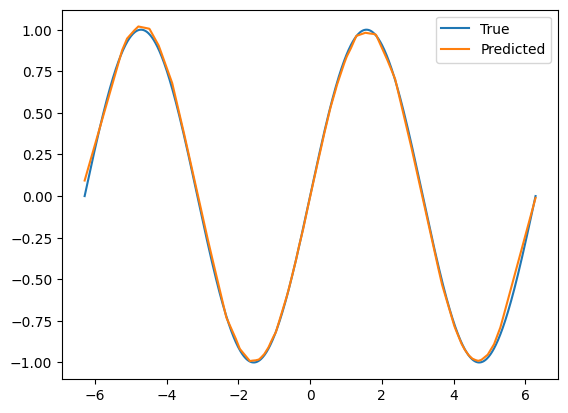

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate data
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y = np.sin(x)

# Create the model
model = Sequential([
    Dense(64, input_dim=1, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x, y, epochs=100, batch_size=32)

# Evaluate the model
predictions = model.predict(x)
plt.plot(x, y, label='True')
plt.plot(x, predictions, label='Predicted')
plt.legend()
plt.show()


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


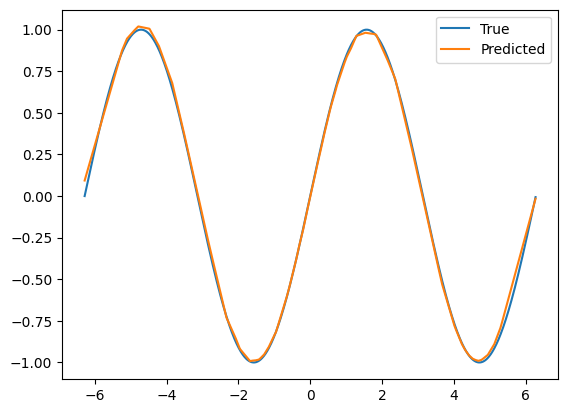

Mean Squared Error at 0.01 input precision: 0.0005696643638576703


In [13]:
# Define the precision level
precision_level = 10e-3

# Generate test data at the specified precision level
x_test = np.arange(-2 * np.pi, 2 * np.pi, precision_level)
y_test = np.sin(x_test)

# Predict using the model
predictions_test = model.predict(x_test)

plt.plot(x_test, y_test, label='True')
plt.plot(x_test, predictions_test, label='Predicted')
plt.legend()
plt.show()

# Calculate the mean squared error
mse = np.mean((y_test - predictions_test.flatten())**2)
print(f'Mean Squared Error at {precision_level} input precision: {mse}')

## Exercise 2 : 
- Create a neural network to transform a binary value into a decimal value (Use a linear activation and no hidden layers).
- Display the weights of your model and show that it converges to powers of 2 (1, 2, 4 and 8)

In [31]:
# Generate binary data
binary_data = np.array([[0, 0, 0, 0],
                        [0, 0, 0, 1],
                        [0, 0, 1, 0],
                        [0, 0, 1, 1],
                        [0, 1, 0, 0],
                        [0, 1, 0, 1],
                        [0, 1, 1, 0],
                        [0, 1, 1, 1],
                        [1, 0, 0, 0],
                        [1, 0, 0, 1],
                        [1, 0, 1, 0],
                        [1, 0, 1, 1],
                        [1, 1, 0, 0],
                        [1, 1, 0, 1],
                        [1, 1, 1, 0],
                        [1, 1, 1, 1]])

decimal_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Create the model
model_binary_to_decimal = Sequential([
    Dense(1, input_dim=4, activation='linear')
])

# Compile the model
model_binary_to_decimal.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mean_squared_error')

# Train the model
model_binary_to_decimal.fit(binary_data, decimal_data, epochs=100, batch_size=4, verbose=0)

# Display the weights
weights, biases = model_binary_to_decimal.layers[0].get_weights()
print("Weights:", weights.flatten())
print("Biases:", biases)

# Predict using the model
predictions_binary_to_decimal = model_binary_to_decimal.predict(binary_data)
print("Predictions:", predictions_binary_to_decimal.flatten())
# Check if the predictions are close to the expected decimal values
for i, (pred, true) in enumerate(zip(predictions_binary_to_decimal.flatten(), decimal_data)):
    print(f"Binary: {binary_data[i]}, Predicted: {pred:.2f}, True: {true}")

Weights: [7.999914  3.999915  1.9999183 0.9999181]
Biases: [0.0001864]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predictions: [1.8639883e-04 1.0001045e+00 2.0001047e+00 3.0000229e+00 4.0001011e+00
 5.0000196e+00 6.0000196e+00 6.9999375e+00 8.0001001e+00 9.0000181e+00
 1.0000018e+01 1.0999936e+01 1.2000015e+01 1.2999933e+01 1.3999933e+01
 1.4999852e+01]
Binary: [0 0 0 0], Predicted: 0.00, True: 0
Binary: [0 0 0 1], Predicted: 1.00, True: 1
Binary: [0 0 1 0], Predicted: 2.00, True: 2
Binary: [0 0 1 1], Predicted: 3.00, True: 3
Binary: [0 1 0 0], Predicted: 4.00, True: 4
Binary: [0 1 0 1], Predicted: 5.00, True: 5
Binary: [0 1 1 0], Predicted: 6.00, True: 6
Binary: [0 1 1 1], Predicted: 7.00, True: 7
Binary: [1 0 0 0], Predicted: 8.00, True: 8
Binary: [1 0 0 1], Predicted: 9.00, True: 9
Binary: [1 0 1 0], Predicted: 10.00, True: 10
Binary: [1 0 1 1], Predicted: 11.00, True: 11
Binary: [1 1 0 0], Predicted: 12.00, True: 12
Binary: [1 1 0 1], Predicted: 13.00, True: 13
Binary: [1 1 1 0], Predic

: 

## Exercise 3

- Based on this example, create 16 clusters and their associated classes. 
- Repeat it to obtain two datasets, one for training and one for validation.
- Build neural network classifier and train it
- Trace loss and accuracy history. 
- Evaluate it over the validation set and display confusion matrix




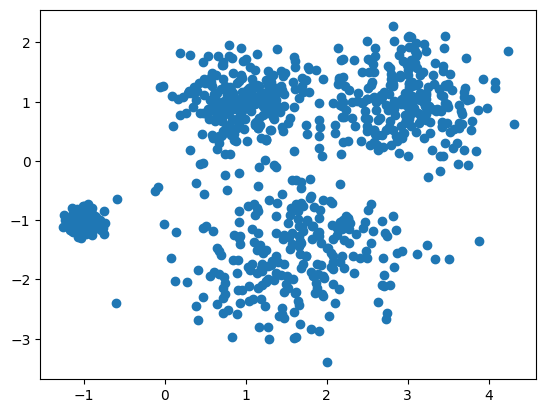

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1.5, -1.5], [3, 1]]
X, labels = make_blobs(n_samples=1000, centers=centers, cluster_std=[0.4, 0.1, 0.75, 0.5], random_state=0)

plt.scatter(X[:,0], X[:,1])
plt.show()

Epoch 1/50


c:\Users\nolan\anaconda3\envs\Nolan_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1782 - loss: 2.5831 - val_accuracy: 0.3925 - val_loss: 1.9444
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4530 - loss: 1.7072 - val_accuracy: 0.4950 - val_loss: 1.3249
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5155 - loss: 1.2266 - val_accuracy: 0.5950 - val_loss: 1.0356
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6092 - loss: 0.9773 - val_accuracy: 0.6375 - val_loss: 0.9081
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6598 - loss: 0.8796 - val_accuracy: 0.7200 - val_loss: 0.7963
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6822 - loss: 0.8387 - val_accuracy: 0.7450 - val_loss: 0.7369
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6951 - loss: 0.7705 - val_accuracy: 0.7750 - val_loss: 0.6680
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7349 - loss: 0.6960 - val_accuracy: 0.8075 - val_loss: 0.6196
Epo

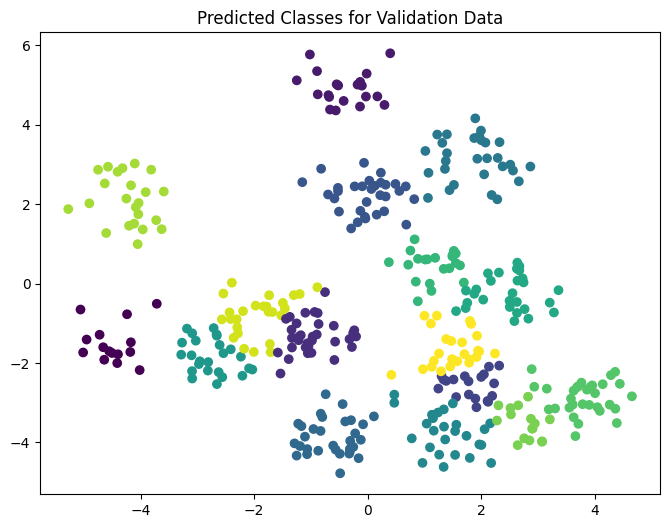

Validation Accuracy: 0.89
Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0 13  0  0  0  2  0  0  0  0  1  0  0  6]
 [ 0  0  0  0 30  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 28  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 23  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 25  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3 19  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  6 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0]
 [ 0  0  7  0  0  0  0  0  2  0  0  0  0  0 21  0]
 [ 0  0  0  5  0  0  0  0  0  0  1  0  0  0  0 19]]


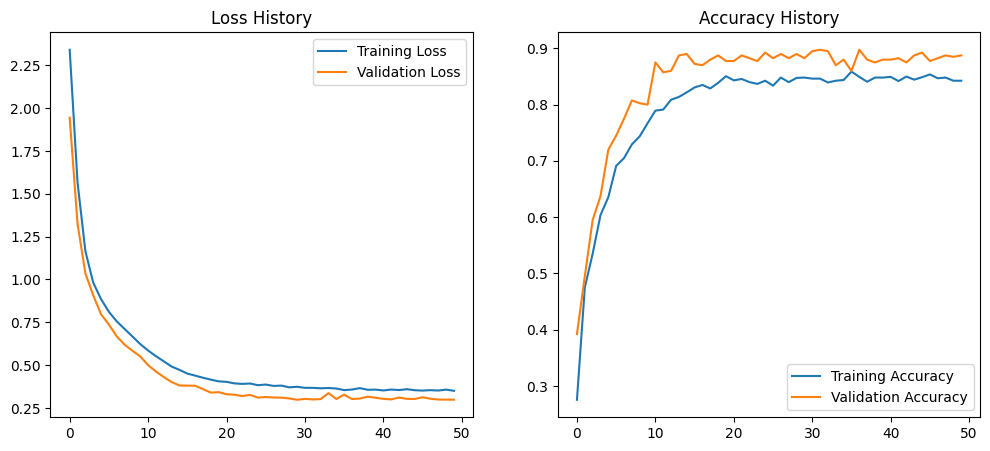

In [16]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Create the dataset with 16 clusters
centers = np.random.rand(16, 2) * 10 - 5  # Generating random centers for 16 clusters
X, labels = make_blobs(n_samples=2000, centers=centers, cluster_std=0.5, random_state=0)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, labels, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=16)
y_val_cat = to_categorical(y_val, num_classes=16)

# Build the neural network classifier
model_classifier = Sequential([
    Dense(64, input_dim=2, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='softmax')  # 16 classes for 16 clusters
])

# Compile the model
model_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_classifier.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_data=(X_val, y_val_cat))

# Evaluate the model
y_val_pred = model_classifier.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Plot the predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val_pred_classes, cmap='viridis')
plt.title('Predicted Classes for Validation Data')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred_classes)
print(f'Validation Accuracy: {accuracy:.2f}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Plot loss and accuracy history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss History')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy History')

plt.show()


13014/13014 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step


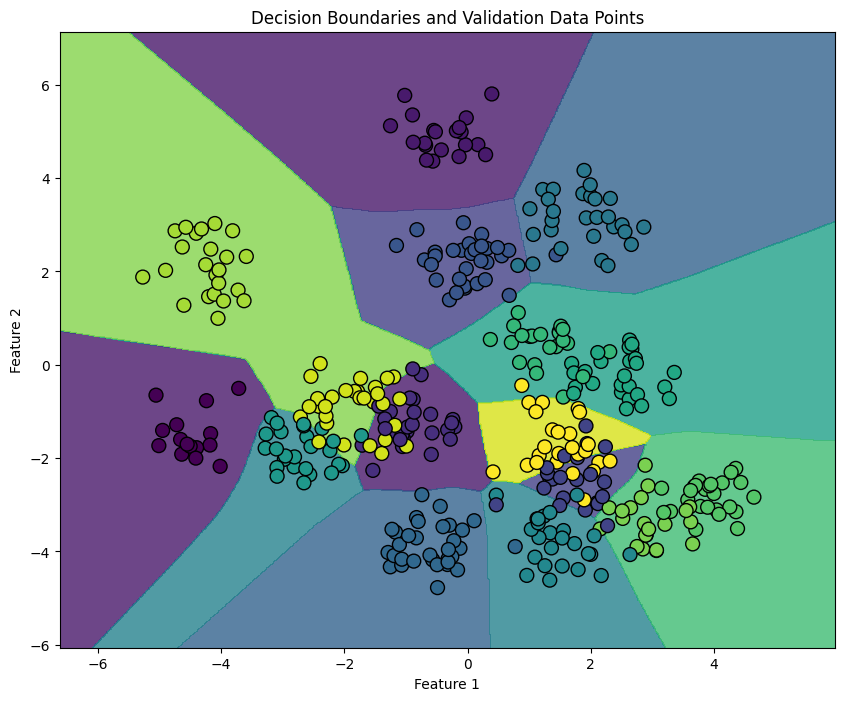

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid over the input space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh grid
Z = model_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

# Plot the original validation data points
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, edgecolor='k', marker='o', s=100, cmap='viridis')
plt.title('Decision Boundaries and Validation Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
